# Basic Random Walk

This is a basic 1-dimensioanl random walk.

First, import the needed libraries

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

Now take the walks

Text(100, 0.6643608343533098, 'μ=0.66')

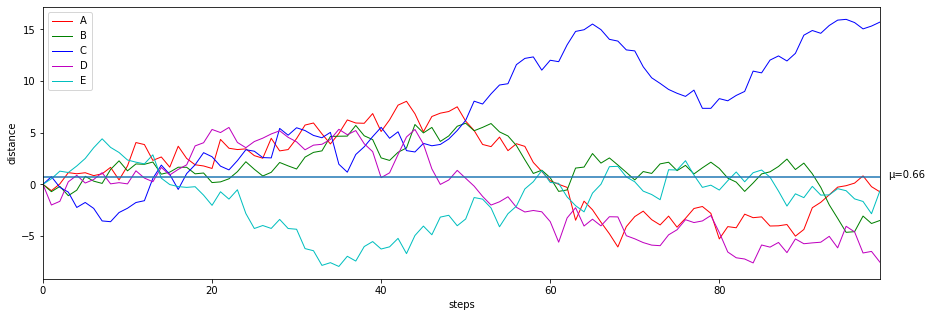

In [7]:
number_of_walks = 5
steps_in_each_walk = 100

# Make random distances for each step
step_distances = random.randn(number_of_walks * (steps_in_each_walk -1)).reshape(number_of_walks, -1)

# Make each walk start at step 0 by horizontally stacking 0s
# at the beginning of the walks

starts = np.zeros(step_distances.shape[0]).reshape(-1, 1)
walk_distances = np.hstack([starts, step_distances])
walks = walk_distances.cumsum(axis=1)

# Now make an array of integers that will serve as the x axis
steps = np.arange(walks.shape[1])

# Find the mean distance at the end of each walk by taking the mean
# of the last column of walks

mean_dist = walks[:, -1].mean()

# Colors, labels, and alpha settings for our lines
colors = ['r', 'g', 'b', 'm', 'c']
labels = ['A', 'B', 'C', 'D', 'E']
alpha = 0.5

# Create a grid of 1 by 1 plots and size it
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# Make the axis labels
ax.set_ylabel('distance')
ax.set_xlabel('steps')

# Force the x axis limits to match the first and last step
# by default matplotlib may try to pad this which will make
# it look like a mess

ax.set_xlim(steps[0], steps[-1])

# Plot each walk. Zip together the iterables we will need and
# just plot to the same axes

for walk_idx, color, label in zip(range(walks.shape[0]), colors, labels):
    ax.plot(steps, walks[walk_idx], label=label, color=color, lw=1)

# Behind every great plot is an inspirational legend.
# Make your here

ax.legend(loc='best')

# Make a line (and label for it) that show the mean distance
# convered by each walk

ax.axhline(mean_dist, 0, steps[-1])
ax.text(steps[-1] + 1, mean_dist, 'μ={:.2f}'.format(mean_dist))